# <center> Predict Customer Clicked Ads Classification by Using Machine Learning

<center> Author : Arya Octavian

---------------

# PART 1 - EDA

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (12, 8)
rcParams['lines.linewidth'] = 3
rcParams['axes.titlesize'] = 'x-large'
rcParams['xtick.labelsize'] = 'medium'
rcParams['ytick.labelsize'] = 'medium'

In [3]:
df = pd.read_csv("Clicked Ads Dataset.csv")
df

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance
...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,499691990.0,208.58,Laki-Laki,2/11/2016 21:49,Yes,Semarang,Jawa Tengah,Finance
996,996,51.30,45,474475190.0,134.42,Laki-Laki,4/22/2016 2:07,Yes,Pakanbaru,Riau,Electronic
997,997,NaN,51,296910040.0,120.37,Laki-Laki,2/1/2016 17:24,Yes,Samarinda,Kalimantan Timur,Travel
998,998,55.55,19,293445530.0,187.95,Perempuan,3/24/2016 2:35,No,Tangerang,Banten,Bank


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [5]:
df.columns = ['ID','Daily_Time_Spent_on_Site','Age','Area_Income','Daily_Internet_Usage','Male','Timestamp','Clicked_on_Ad','City','Province','Category']

In [6]:
df.isna().sum()

ID                           0
Daily_Time_Spent_on_Site    13
Age                          0
Area_Income                 13
Daily_Internet_Usage        11
Male                         3
Timestamp                    0
Clicked_on_Ad                0
City                         0
Province                     0
Category                     0
dtype: int64

In [7]:
df.duplicated().any()

False

## Univariate Analysis

In [8]:
df.describe()

,ID,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [9]:
nums = ['Daily_Time_Spent_on_Site','Age','Area_Income','Daily_Internet_Usage']
cats = ['Male','Timestamp','Clicked_on_Ad','City','Province','Category']

### Distribution

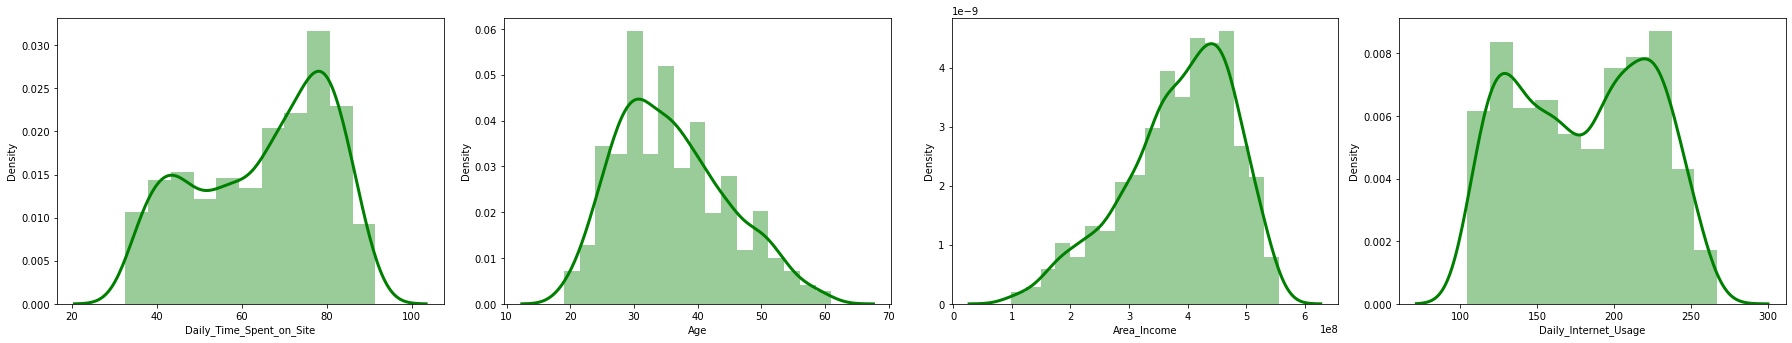

In [10]:
plt.figure(figsize=(25, 9))
for i in range(len(nums)):
    plt.subplot(2,4,i+1)
    sns.distplot(df[nums[i]],color='g')
    plt.tight_layout()

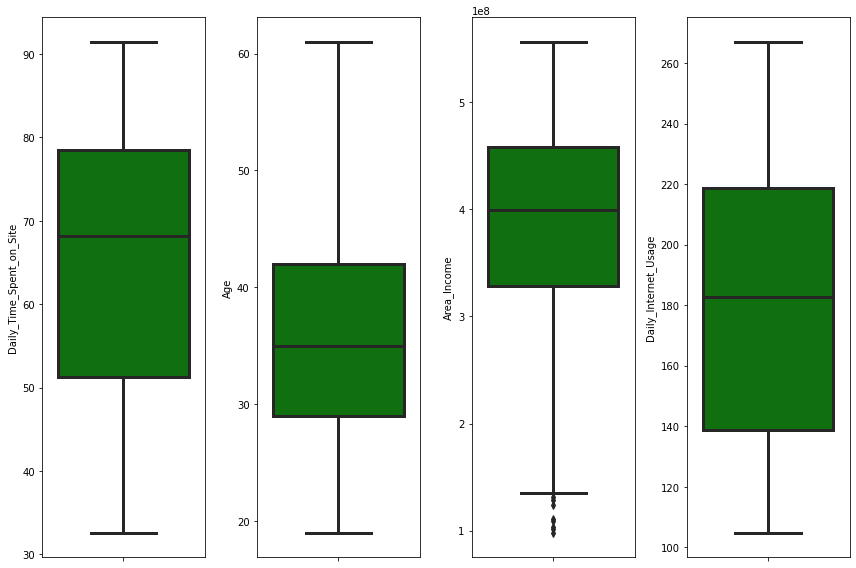

In [11]:
for i in range(len(nums)):
    plt.subplot(1,4,i+1)
    sns.boxplot(y=df[nums[i]],color='g',orient='v')
    plt.tight_layout()

In [12]:
df[cats].describe()

,Male,Timestamp,Clicked_on_Ad,City,Province,Category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


In [13]:
df['Daily_Time_Spent_on_Site'].fillna(df['Daily_Time_Spent_on_Site'].median(), inplace=True)
df['Area_Income'].fillna(df['Area_Income'].median(), inplace=True)
df['Daily_Internet_Usage'].fillna(df['Daily_Internet_Usage'].median(), inplace=True)

df['Male'].replace([np.NaN], 'Perempuan', inplace=True)

print(df.isna().sum())

ID                          0
Daily_Time_Spent_on_Site    0
Age                         0
Area_Income                 0
Daily_Internet_Usage        0
Male                        0
Timestamp                   0
Clicked_on_Ad               0
City                        0
Province                    0
Category                    0
dtype: int64


### Click Ads Performance 

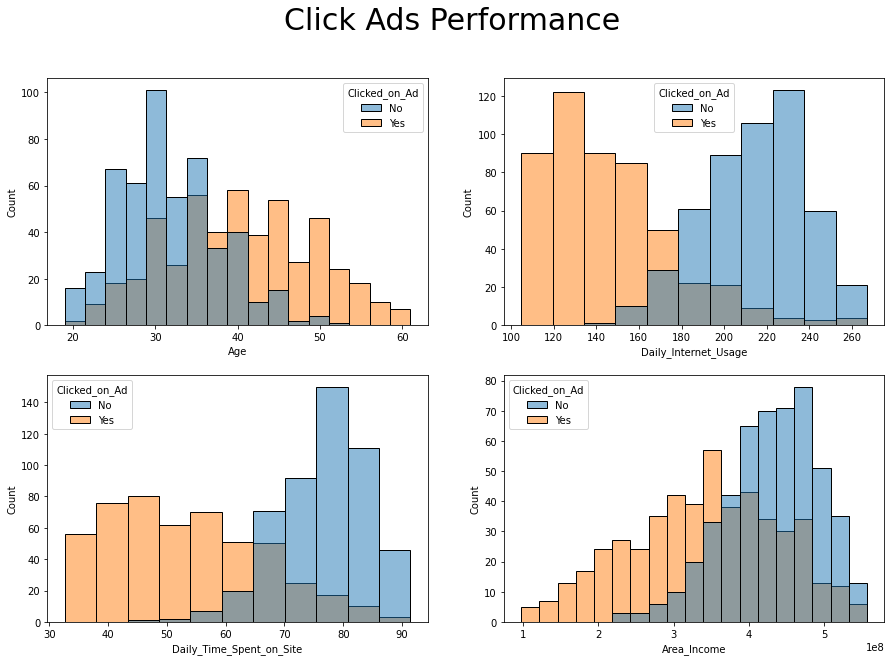

In [14]:
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(15,10))
fig.suptitle('Click Ads Performance', size = 30)

sns.histplot(df, x='Age', hue='Clicked_on_Ad', ax=axes[0,0])
sns.histplot(df, x='Daily_Internet_Usage', hue='Clicked_on_Ad', ax=axes[0,1])
sns.histplot(df, x='Daily_Time_Spent_on_Site', hue='Clicked_on_Ad', ax=axes[1,0])
sns.histplot(df, x='Area_Income', hue='Clicked_on_Ad', ax=axes[1,1])

plt.show()

- Umur 25-40 mendominasi, bisa jadi target ads
- Keempat fitur sangat terdefinisi antara yg yes or no sehingga bisa sangat baik untuk klasifikasi

## Bivariate Analysis

### Numerical Features

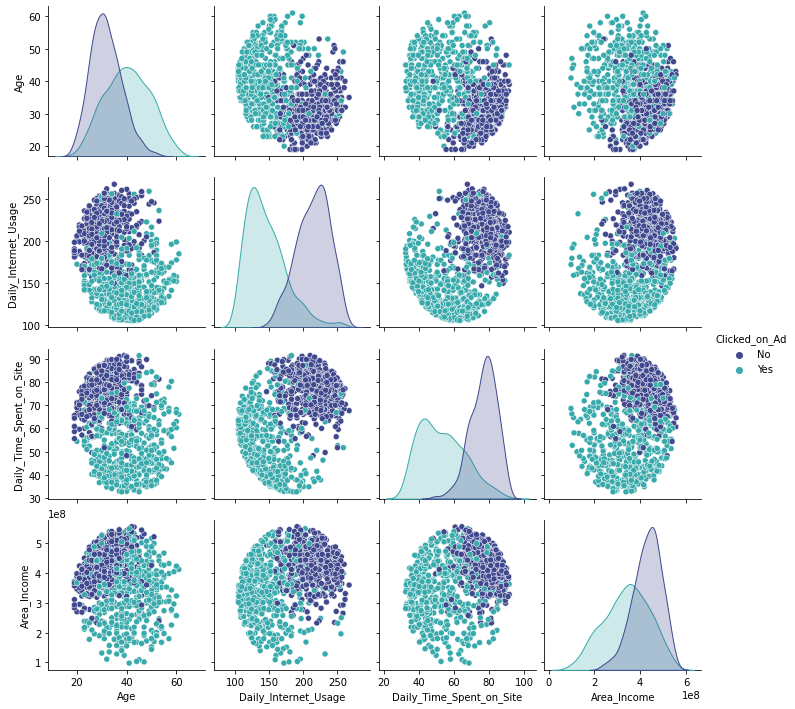

In [15]:
sns.pairplot(df, hue='Clicked_on_Ad', vars=['Age','Daily_Internet_Usage','Daily_Time_Spent_on_Site','Area_Income'], palette='mako')
plt.show()

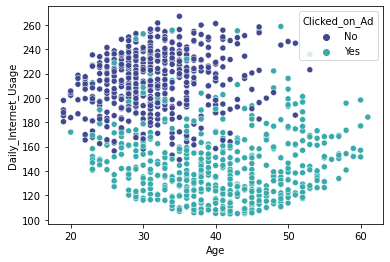

In [16]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age',y='Daily_Internet_Usage', data=df, hue="Clicked_on_Ad", palette='mako')
plt.show()

- Tanpa menghiraukan usia, user yang menggunakan internet lebih sebentar cenderung melakukan klik pada iklan
- Selain itu, user dengan usia di bawah 45 tahun yang menghabiskan waktu lebih banyak di internet tidak klik iklan

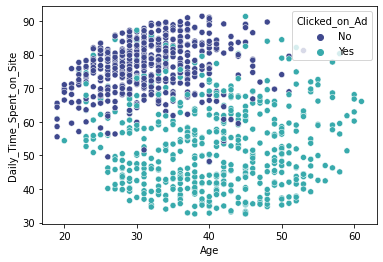

In [17]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age',y='Daily_Time_Spent_on_Site', data=df, hue="Clicked_on_Ad", palette='mako')
plt.show()

- Secara keseluruhan usia user adalah 19-61, produk yang diiklankan harus sesuai dengan rentang umur tersebut. Apablia tidak sesuai maka website ini tidak cocok untuk mengiklankan produk kita.
- User yang paling sering menghabiskan waktu pada website adalah user dengan umur di bawah 45 tahun. Hal ini membuat kelompok umur di bawah 45 tahun cocok menjadi target campaign.
- User yang menghabiskan waktu lebih sedikit di website cenderung melakukan klik pada iklan.

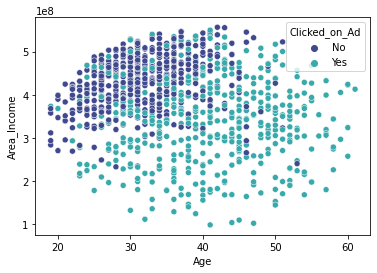

In [18]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age',y='Area_Income', data=df, hue="Clicked_on_Ad", palette='mako')
plt.show()

- Kedua fitur di atas tidak memiliki hubungan yang terdefinisi jelas. Namun dapat kita lihat bahwa user dangan income yang besar terdistribusi lebih banyak pada rentang umur 20-40

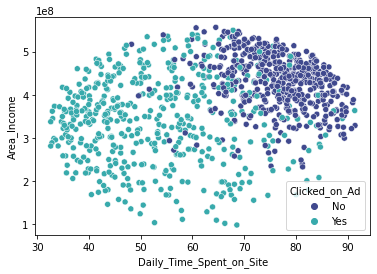

In [19]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Daily_Time_Spent_on_Site',y='Area_Income', data=df, hue="Clicked_on_Ad", palette='mako')
plt.show()

- User yang menghabiskan waktu di website lebih sebentar dan income yang lebih rendah cenderung klik pada iklan. 
- Namun user dengan income tinggi dan menghabiskan waktu di website lebih lama cenderung tidak klik iklan.
- Dapat disimpulkan bahwa iklan yang dibuat tidak terpersonalisasi untuk user dengan area income tertentu.

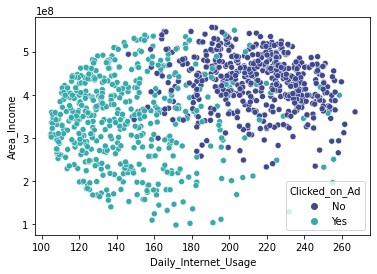

In [20]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Daily_Internet_Usage',y='Area_Income', data=df, hue="Clicked_on_Ad", palette='mako')
plt.show()

- Tidak berbeda dengan sebelumnya, user yang menghabiskan waktu lebih banyak di internet justru tidak melakukan klik pada iklan.
- Dapat diasumsikan sementara bahwa fitur Area_Income bukan fitur yang berpengaruh besar untuk klasifikasi.

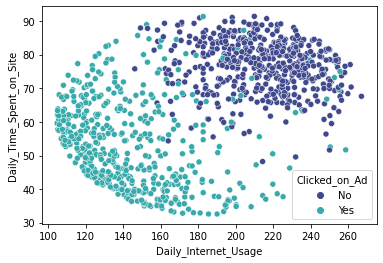

In [21]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Daily_Internet_Usage',y='Daily_Time_Spent_on_Site', data=df, hue="Clicked_on_Ad", palette='mako')
plt.show()

- Dari plot di atas dapat disimpulkan bahwa user yang internetan dan mengunjungi website lebih sebentar cenderung akan melakukan klik pada iklan.
- Fitur ini diduga akan berdampak signifikan pada proses klasifikasi.
- Saran EDA : Berdasarkan statement di atas, alangkah lebih baik apabila menggunakan iklan pop up di sebelah kanan atau kiri yang muncul setiap kali user mengganti page pada website. Namun iklan harus relevan dengan produk yang ditampilkan per kategori.

### Categorical Features

In [22]:
print(df['Clicked_on_Ad'].value_counts())

No     500
Yes    500
Name: Clicked_on_Ad, dtype: int64


- Target atau kolom `Clicked_on_Ad` sudah balance sehingga tidak perlu melakukan oversampling atau undersampling

In [23]:
print(cats)

['Male', 'Timestamp', 'Clicked_on_Ad', 'City', 'Province', 'Category']


In [24]:
print(df['Male'].value_counts())

Perempuan    521
Laki-Laki    479
Name: Male, dtype: int64


- Fitur `Male` terbilang cukup balance namun perlu tetap dicari hubungannya dengan target.

In [25]:
df_g1 = df.groupby(['Male','Clicked_on_Ad']).agg({'ID' : 'count'}).reset_index()
df_g1.columns = ['Male','Clicked','Total']
df_g1['Percentage(%)'] = df_g1.groupby('Male').apply(lambda x: round(x.Total/x.Total.sum() *100, 0)).values
df_g1

,Male,Clicked,Total,Percentage(%)
0,Laki-Laki,No,248,52.0
1,Laki-Laki,Yes,231,48.0
2,Perempuan,No,252,48.0
3,Perempuan,Yes,269,52.0


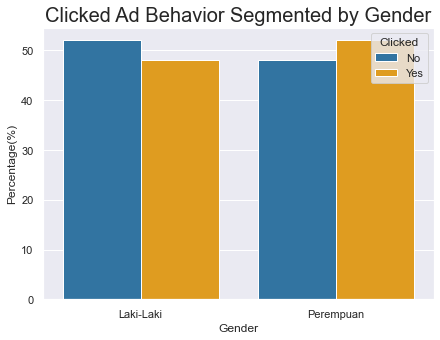

In [26]:
palette = ['tab:blue', 'orange']
plt.figure(figsize=(7, 5))
sns.set_theme(style='darkgrid', palette=palette)
sns.barplot(data=df_g1, x='Male', y='Percentage(%)', hue='Clicked')
plt.xlabel('Gender')
plt.title('Clicked Ad Behavior Segmented by Gender', size = 20)
plt.show()

- User perempuan lebih banyak melakukan klik pada iklan.
- Meskipun begitu karena perbedaannya tidak signifikan atau lebih dari 5% maka gender bukan menjadi fitur yang bagus untuk mengklasifikasi target.

In [27]:
print(df['City'].value_counts())

Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
Pontianak            12
Surakarta            12
Serang               11
Name: City, dtype: int64


- Kota tidak memiliki value yang berbeda jauh signifikan. Ditambah dengan terlalu banyaknya unique values maka fitur ini kemungkinan akan di drop dari dataset

In [28]:
print(df['Province'].value_counts())

Daerah Khusus Ibukota Jakarta    253
Jawa Barat                       210
Jawa Timur                        90
Banten                            76
Jawa Tengah                       53
Sumatra Utara                     48
Sumatra Selatan                   42
Kepulauan Riau                    34
Kalimantan Timur                  34
Sulawesi Selatan                  33
Lampung                           29
Kalimantan Selatan                23
Riau                              23
Bali                              21
Sumatra Barat                     19
Kalimantan Barat                  12
Name: Province, dtype: int64


In [29]:
df_g2 = df.groupby(['Province','Clicked_on_Ad']).agg({'ID' : 'count'}).reset_index()
df_g2.columns = ['Province','Clicked','Total']
df_g2['Percentage(%)'] = df_g2.groupby('Province').apply(lambda x: round(x.Total/x.Total.sum() *100, 0)).values
df_g2

,Province,Clicked,Total,Percentage(%)
0,Bali,No,12,57.0
1,Bali,Yes,9,43.0
2,Banten,No,31,41.0
3,Banten,Yes,45,59.0
4,Daerah Khusus Ibukota Jakarta,No,137,54.0
5,Daerah Khusus Ibukota Jakarta,Yes,116,46.0
6,Jawa Barat,No,92,44.0
7,Jawa Barat,Yes,118,56.0
8,Jawa Tengah,No,30,57.0
9,Jawa Tengah,Yes,23,43.0


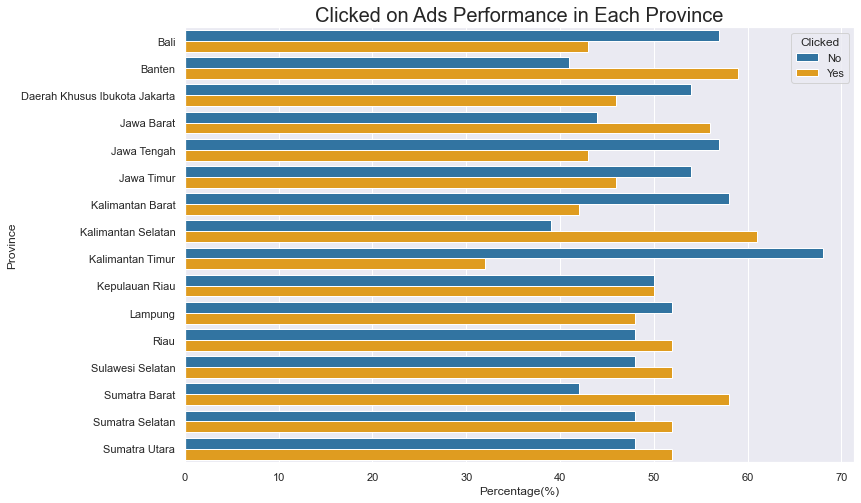

In [30]:
palette = ['tab:blue', 'orange']
sns.set_theme(style='darkgrid', palette=palette)
sns.barplot(data=df_g2,
            x='Percentage(%)',
            y='Province',
            hue='Clicked')
plt.title('Clicked on Ads Performance in Each Province', size=20)
plt.show()

- Provinsi dengan ads yang diklik terbanyak Kalimantan Selatan sedangkan ads klik terdikit berada di Kalimantan Timur.
- Hal ini sangat menarik karena berbeda dari jumlah user terbanyak yaitu berada di DKI Jakarta.
- Dengan kata lain konversi klik iklan terbaik berada di Kalimantan Selatan.

In [31]:
print(df['Category'].value_counts())

Otomotif      112
House         109
Health        104
Fashion       102
Food           99
Furniture      98
Travel         98
Electronic     97
Finance        91
Bank           90
Name: Category, dtype: int64


In [32]:
df_g3 = df.groupby(['Category','Clicked_on_Ad']).agg({'ID' : 'count'}).reset_index()
df_g3.columns = ['Category','Clicked','Total']
df_g3['Percentage(%)'] = df_g3.groupby('Category').apply(lambda x: round(x.Total/x.Total.sum() *100, 0)).values
df_g3

,Category,Clicked,Total,Percentage(%)
0,Bank,No,51,57.0
1,Bank,Yes,39,43.0
2,Electronic,No,49,51.0
3,Electronic,Yes,48,49.0
4,Fashion,No,46,45.0
5,Fashion,Yes,56,55.0
6,Finance,No,39,43.0
7,Finance,Yes,52,57.0
8,Food,No,50,51.0
9,Food,Yes,49,49.0


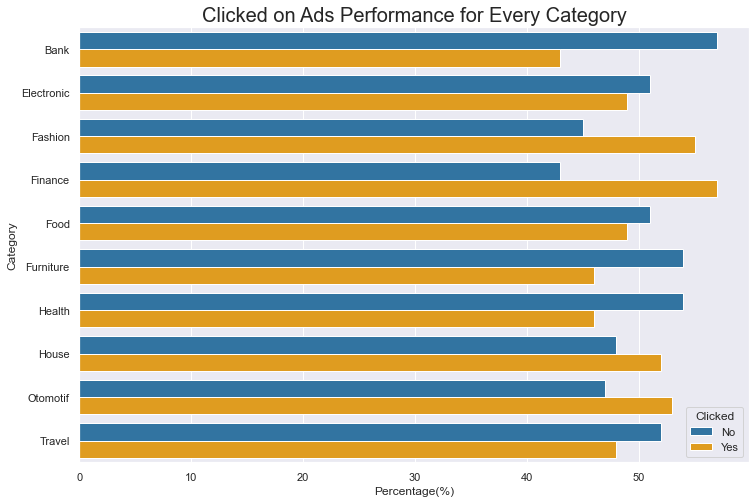

In [33]:
palette = ['tab:blue', 'orange']
sns.set_theme(style='darkgrid',palette = palette)
sns.barplot(data=df_g3,
            x='Percentage(%)',
            y='Category',
            hue='Clicked')
plt.title('Clicked on Ads Performance for Every Category', size=20)
plt.show()

- Klik iklan terbanyak berada di kategori produk Finance, sedangkan paling sedikit berada di kategori Bank.
- Hal ini bisa dijadikan saran untuk memprioritaskan produk yang akan dilakukan retargeting.

In [34]:
df_copy = df.copy()

In [35]:
df_copy['Timestamp'] = pd.to_datetime(df_copy['Timestamp'])

df_copy['Month'] = df_copy['Timestamp'].dt.month
df_copy['Week_Number'] = df_copy['Timestamp'].dt.isocalendar().week
df_copy['Day_Number'] = df_copy['Timestamp'].dt.day
df_copy['Day_of_Week'] = df_copy['Timestamp'].dt.dayofweek
df_copy['Hour'] = df_copy['Timestamp'].dt.hour
df_copy = df_copy.drop(['Timestamp'], axis=1)

df_copy['Week_Number'] = df_copy['Week_Number'].astype('int')

In [36]:
df_copy_yes = df_copy[df_copy['Clicked_on_Ad'] == 'Yes']
df_copy_yes.sample(5)

,ID,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Clicked_on_Ad,City,Province,Category,Month,Week_Number,Day_Number,Day_of_Week,Hour
898,898,55.46,37,294552230.0,108.10,Perempuan,Yes,Balikpapan,Kalimantan Timur,Travel,2,7,21,6,23
508,508,80.30,58,343633570.0,173.43,Perempuan,Yes,Padang,Sumatra Barat,Electronic,4,14,4,0,20
638,638,61.04,41,530635840.0,149.21,Perempuan,Yes,Cimahi,Jawa Barat,Food,5,18,2,0,15
994,994,43.70,28,441888720.0,173.01,Perempuan,Yes,Tasikmalaya,Jawa Barat,Fashion,4,14,4,0,3
721,721,43.07,36,424081140.0,137.63,Laki-Laki,Yes,Bandung,Jawa Barat,Otomotif,2,6,11,3,20


In [37]:
dfm = df_copy_yes.groupby(['Month']).agg({'ID' : 'count'}).reset_index()
dfm

,Month,ID
0,1,69
1,2,83
2,3,74
3,4,74
4,5,79
5,6,71
6,7,50


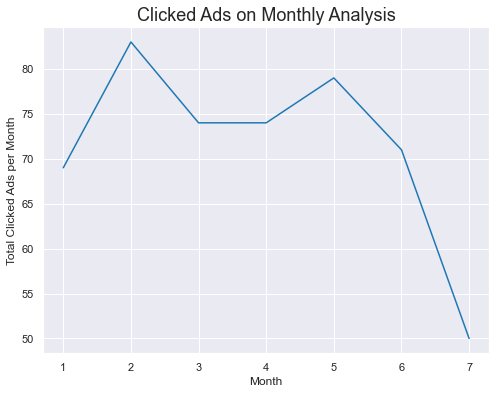

In [38]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Month', y='ID', data=dfm)
plt.title("Clicked Ads on Monthly Analysis",fontsize=18)
plt.ylabel('Total Clicked Ads per Month')
plt.show()

- Performa iklan yang diklik terbanyak terjadi pada bulan kedua dan bulan ke-5 (Mei), Namun performa menurun drastis pada bulan ke-7 (Juli).
- Salah satu faktor yang menyebabkan hal tersebut yaitu fluktuatifnya pertumbuhan ekonomi di Indonesia pada saat itu.
- Mengutip dari laporan Bank Indonesia dari kuartal 2 ke 3 pertumbuhan ekonomi Indonesia turun sebesar 0.2%.
- Dari hal tersebut, dapat dijadikan rekomendasi untuk meningkatkan volume kampanye iklan di awal tahun.

In [39]:
dfw = df_copy_yes.groupby(['Week_Number']).agg({'ID' : 'count'}).reset_index()
dfw 

,Week_Number,ID
0,1,20
1,2,15
2,3,12
3,4,15
4,5,19
5,6,27
6,7,17
7,8,18
8,9,15
9,10,16


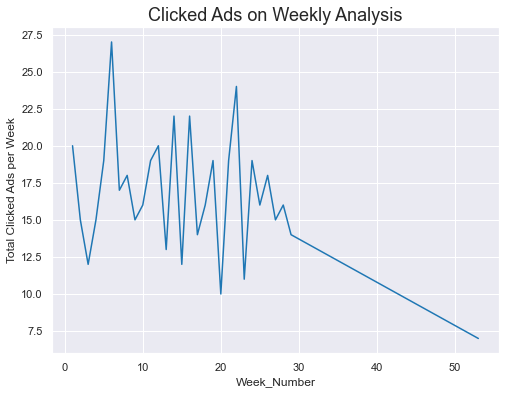

In [40]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Week_Number', y='ID', data=dfw)
plt.title("Clicked Ads on Weekly Analysis",fontsize=18)
plt.ylabel('Total Clicked Ads per Week')
plt.show()

In [41]:
dfd = df_copy_yes.groupby(['Day_Number']).agg({'ID' : 'count'}).reset_index()
dfd

,Day_Number,ID
0,1,19
1,2,10
2,3,26
3,4,14
4,5,18
5,6,14
6,7,14
7,8,15
8,9,20
9,10,19


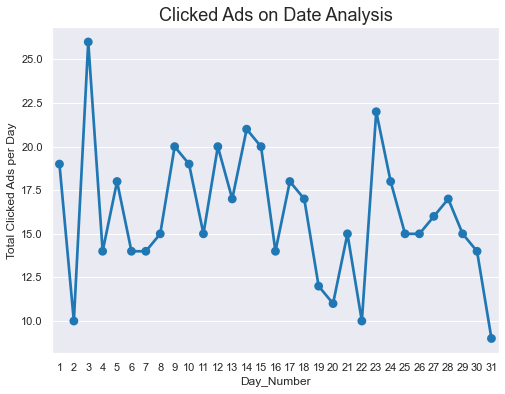

In [42]:
plt.figure(figsize=(8, 6))
sns.pointplot(x='Day_Number', y='ID', data=dfd)
plt.title("Clicked Ads on Date Analysis",fontsize=18)
plt.ylabel('Total Clicked Ads per Day')
plt.show()

- Performa tanggal yang memiliki total iklan diklik paling banyak yaitu pada awal dan akhir bulan.
- Hal ini dapat diasumsikan karena pada awal bulan banyak user yang punya tendensi melakukan belanja bulanan.
- Sedangkan di akhir bulan merupakan tanggal-tanggal user baru menerima uang gajian.
- Iklan produk pada website dapat dimaksimalkan pada tanggal-tanggal tersebut.

In [43]:
dfdw = df_copy_yes.groupby(['Day_of_Week']).agg({'ID' : 'count'}).reset_index()
dfdw

,Day_of_Week,ID
0,0,72
1,1,55
2,2,79
3,3,79
4,4,71
5,5,64
6,6,80


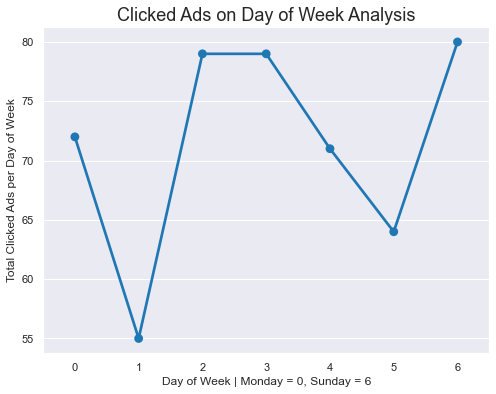

In [44]:
plt.figure(figsize=(8, 6))
sns.pointplot(x='Day_of_Week', y='ID', data=dfdw)
plt.title("Clicked Ads on Day of Week Analysis",fontsize=18)
plt.ylabel('Total Clicked Ads per Day of Week')
plt.xlabel('Day of Week | Monday = 0, Sunday = 6')
plt.show()

- Performa iklan terbaik berada di hari Senin, Rabu, Kamis, Minggu
- Hal ini dapat dijadikan insight untuk mengoptimalkan iklan pada keempat hari tersebut.

In [45]:
dfh = df_copy_yes.groupby(['Hour']).agg({'ID' : 'count'}).reset_index()
dfh

,Hour,ID
0,0,26
1,1,16
2,2,17
3,3,23
4,4,21
5,5,21
6,6,23
7,7,26
8,8,21
9,9,28


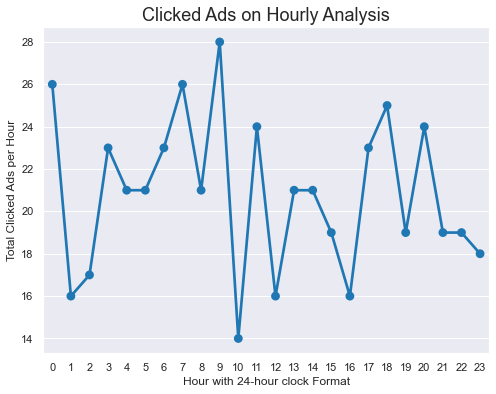

In [46]:
plt.figure(figsize=(8, 6))
sns.pointplot(x='Hour', y='ID', data=dfh)
plt.title("Clicked Ads on Hourly Analysis",fontsize=18)
plt.ylabel('Total Clicked Ads per Hour')
plt.xlabel('Hour with 24-hour clock Format')
plt.show()

- Waktu yang paling sering saat iklan diklik yaitu tengah malam, pagi hari (7-9), dan sore hari (17-20).
- Menentukan scheduling untuk iklan muncul sangat penting.
- Terlebih apabila iklan tersebut memiliki sistem rekomendasi atau yang muncul akan menyesuaikan prioritas kebutuhan tiap user dan jam tayangnya.

## Multivariate Analysis

In [47]:
df_copy.corr()

,ID,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Month,Week_Number,Day_Number,Day_of_Week,Hour
ID,1.000000,-0.032709,0.001835,-0.056619,-0.004913,-0.026998,0.015120,0.079811,-0.003193,0.010927
Daily_Time_Spent_on_Site,-0.032709,1.000000,-0.328623,0.304136,0.513488,-0.008154,-0.009680,-0.019156,0.020556,0.001299
Age,0.001835,-0.328623,1.000000,-0.177965,-0.369229,0.023689,0.007393,-0.038162,0.013593,-0.049905
Area_Income,-0.056619,0.304136,-0.177965,1.000000,0.333692,-0.044539,-0.030872,-0.024801,0.015302,0.035099
Daily_Internet_Usage,-0.004913,0.513488,-0.369229,0.333692,1.000000,0.019824,0.066342,-0.013230,0.009945,0.081572
Month,-0.026998,-0.008154,0.023689,-0.044539,0.019824,1.000000,0.705857,-0.017274,-0.020090,-0.013748
Week_Number,0.015120,-0.009680,0.007393,-0.030872,0.066342,0.705857,1.000000,-0.047502,0.062155,-0.027851
Day_Number,0.079811,-0.019156,-0.038162,-0.024801,-0.013230,-0.017274,-0.047502,1.000000,0.041235,-0.017064
Day_of_Week,-0.003193,0.020556,0.013593,0.015302,0.009945,-0.020090,0.062155,0.041235,1.000000,0.007034
Hour,0.010927,0.001299,-0.049905,0.035099,0.081572,-0.013748,-0.027851,-0.017064,0.007034,1.000000


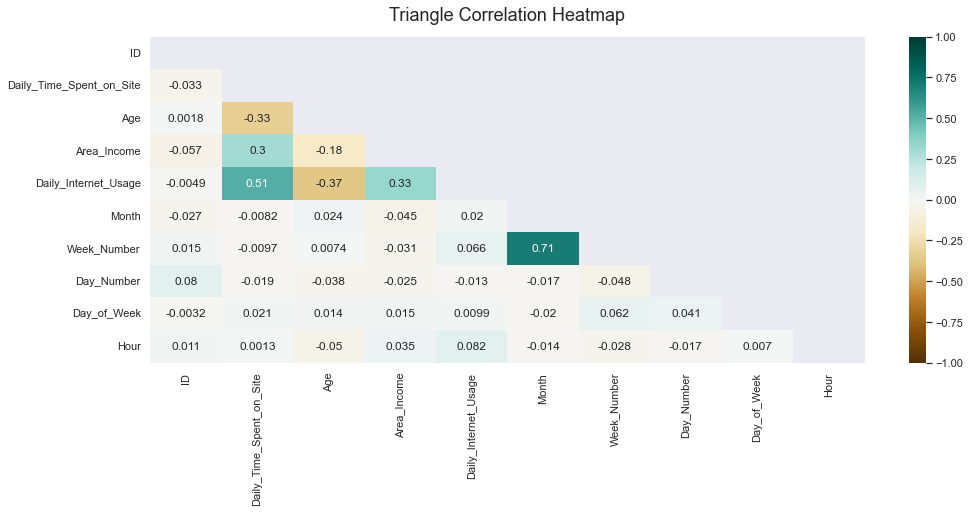

In [48]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_copy.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_copy.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

- Kolom `ID` akan didrop karena seharusnya kategorik unique values bukan numerik

---

# PART 2 - PREPROCESSING

In [49]:
df_prep = df_copy.copy()
df_prep.sample(3)

,ID,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Clicked_on_Ad,City,Province,Category,Month,Week_Number,Day_Number,Day_of_Week,Hour
802,802,50.63,50,180370120.0,142.23,Perempuan,Yes,Bandar Lampung,Lampung,Food,3,10,10,3,15
999,999,45.01,26,209130600.0,178.35,Perempuan,Yes,Serang,Banten,Travel,6,22,3,4,21
807,807,53.22,44,310150260.0,108.85,Perempuan,Yes,Pakanbaru,Riau,Health,5,21,26,3,6


In [50]:
df_prep = df_prep.drop(['ID','City'],axis=1)

### Label Encoding

In [51]:
# Feature `Male`
mapping_gender = {
    'Perempuan' : 0,
    'Laki-Laki' : 1}
df_prep['Male'] = df_prep['Male'].map(mapping_gender)

mapping_target = {
    'No' : 0,
    'Yes' : 1}
df_prep['Clicked_on_Ad'] = df_prep['Clicked_on_Ad'].map(mapping_target)

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Province
df_prep['Province'] =le.fit_transform(df_prep['Province'])

### One Hot Encoding

In [53]:
df_prep = pd.get_dummies(df_prep, columns=['Category'])

df_prep.head(5)

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Clicked_on_Ad,Province,Month,Week_Number,Day_Number,...,Category_Bank,Category_Electronic,Category_Fashion,Category_Finance,Category_Food,Category_Furniture,Category_Health,Category_House,Category_Otomotif,Category_Travel
0,68.95,35,432837300.0,256.09,0,0,2,3,12,27,...,0,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.0,193.77,1,0,0,4,14,4,...,0,0,0,0,1,0,0,0,0,0
2,69.47,26,418501580.0,236.50,0,0,5,3,10,13,...,0,1,0,0,0,0,0,0,0,0
3,74.15,29,383643260.0,245.89,1,0,9,1,1,10,...,0,0,0,0,0,0,0,1,0,0
4,68.37,35,517229930.0,225.58,0,0,15,6,22,3,...,0,0,0,1,0,0,0,0,0,0


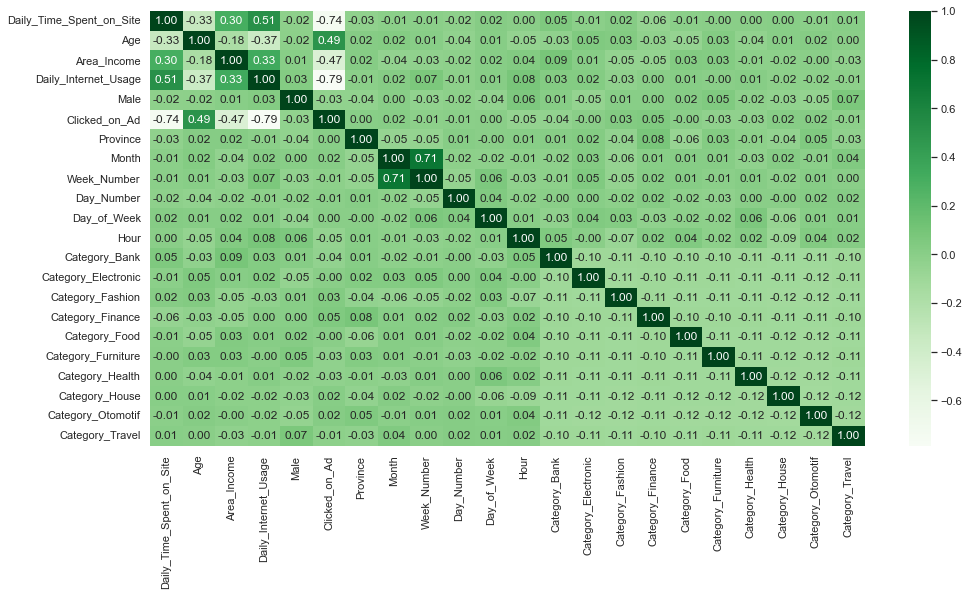

In [54]:
plt.figure(figsize=(16, 8))
sns.heatmap(df_prep.corr(), cmap='Greens', annot=True, fmt='.2f')
plt.show()

- Target atau fitur `Clicked on Ad` terlihat memiliki korelasi yang kuat terhadap fitur-fitur numerik. Hal ini sesuai dengan analisis pada bivariate analysis.

In [55]:
correlations = df_prep.corr()['Clicked_on_Ad'].sort_values()
correlations

Daily_Internet_Usage       -0.785508
Daily_Time_Spent_on_Site   -0.742054
Area_Income                -0.474846
Hour                       -0.047431
Category_Bank              -0.041931
Male                       -0.034030
Category_Furniture         -0.026908
Category_Health            -0.026207
Week_Number                -0.014112
Category_Travel            -0.013454
Day_Number                 -0.005269
Category_Electronic        -0.003379
Category_Food              -0.003348
Day_of_Week                 0.002003
Province                    0.004427
Category_House              0.016044
Month                       0.016095
Category_Otomotif           0.019025
Category_Fashion            0.033042
Category_Finance            0.045200
Age                         0.492531
Clicked_on_Ad               1.000000
Name: Clicked_on_Ad, dtype: float64

- Terdapat data yang redundan terhadap target yaitu `Daily_Internet_Usage` dan `Daily_Time_Spent_on_Site`. Namun hal ini akan diabaikan karena mengingat fitur lain banyak yang mendekati 0 atau tidak memiliki korelasi dengan target.

### Splitting Dataset

In [56]:
X = df_prep.drop(['Clicked_on_Ad'],axis=1)
y = df_prep['Clicked_on_Ad']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

print(f'Jumlah Data Train : {X_train.shape[0]}')
print(f'Jumlah Data Test: {X_test.shape[0]}')

Jumlah Data Train : 800
Jumlah Data Test: 200


-----------

# PART 3 - MODELLING

## Without Normalization

In [59]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score, confusion_matrix

#Evaluation using train test split
def evaluation(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print('**EVALUATION WITH TRAIN TEST SPLIT**\nAUC Train vs Test:')
    print('AUC Score Train vs Test:')
    print(f'AUC Score Train proba: {round(roc_auc_score(y_train,y_pred_proba_train[:,1]),6)}')
    print(f'AUC Score Test proba: {round(roc_auc_score(y_test,y_pred_proba[:,1]),6)}\n')
    
    print('Others Metrics Evaluation:')
    print(f'Test Accuracy Score : {round(accuracy_score(y_test,y_pred),4)}')
    print(f'Precision Score Test: {round(precision_score(y_test,y_pred),4)}')
    print(f'Recall Score Test : {round(recall_score(y_test,y_pred),4)}')
    print(f'F1 Score Test : {round(f1_score(y_test,y_pred),4)}\n')
    
    print('**CONFUSION MATRIX**') 
    print(confusion_matrix(y_test, model.predict(X_test)))

In [60]:
from sklearn.model_selection import cross_validate, KFold

# score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
#     print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
#     print('roc_auc (crossval test): '+ str(score['test_score'].mean()))


#Evaluation using cross validation method
cross_roc_auc_score_lst_train = []
cross_roc_auc_score_lst_test = []
def cross_val_evaluation(model):
    kf = KFold(n_splits=5)
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        print(X_train.shape, y_train.shape)
        y_pred_proba = model.predict_proba(X_test)
        y_pred_proba_train = model.predict_proba(X_train)
        cross_val_roc_auc_score_train = round(roc_auc_score(y_train,y_pred_proba_train[:,1]),3)
        cross_val_roc_auc_score_test = round(roc_auc_score(y_test,y_pred_proba[:,1]),3)
        cross_roc_auc_score_lst_train.append(cross_val_roc_auc_score_train)
        cross_roc_auc_score_lst_test.append(cross_val_roc_auc_score_test)
    print('**EVALUATION CROSS VALIDATION**\nAUC Train vs Test:')
    print(f'AUC Score Cross_Val Proba Train: {round(np.mean(cross_roc_auc_score_lst_train),3)}')
    print(f'AUC Score Cross_Val Proba Test: {round(np.mean(cross_roc_auc_score_lst_test),3)}') 

In [61]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.best_estimator_._final_estimator.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(30).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('Score')
    plt.ylabel('Features')
    plt.title('Feature Importance Score')

### Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [63]:
evaluation(model_lr)

**EVALUATION WITH TRAIN TEST SPLIT**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 0.785719
AUC Score Test proba: 0.708776

Others Metrics Evaluation:
Test Accuracy Score : 0.445
Precision Score Test: 0.0
Recall Score Test : 0.0
F1 Score Test : 0.0

**CONFUSION MATRIX**
[[ 89   0]
 [111   0]]


In [64]:
cross_val_evaluation(model_lr)

(800, 21) (800,)
(800, 21) (800,)
(800, 21) (800,)
(800, 21) (800,)
(800, 21) (800,)
**EVALUATION CROSS VALIDATION**
AUC Train vs Test:
AUC Score Cross_Val Proba Train: 0.769
AUC Score Cross_Val Proba Test: 0.767


### Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
model_dtree = DecisionTreeClassifier(random_state=42)
model_dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [66]:
evaluation(model_dtree)

**EVALUATION WITH TRAIN TEST SPLIT**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 0.905507

Others Metrics Evaluation:
Test Accuracy Score : 0.905
Precision Score Test: 0.9259
Recall Score Test : 0.9009
F1 Score Test : 0.9132

**CONFUSION MATRIX**
[[ 81   8]
 [ 11 100]]


In [67]:
cross_val_evaluation(model_dtree)

(800, 21) (800,)
(800, 21) (800,)
(800, 21) (800,)
(800, 21) (800,)
(800, 21) (800,)
**EVALUATION CROSS VALIDATION**
AUC Train vs Test:
AUC Score Cross_Val Proba Train: 0.885
AUC Score Cross_Val Proba Test: 0.85


### Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
model_rforest = RandomForestClassifier(random_state=42)
model_rforest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [69]:
evaluation(model_rforest)

**EVALUATION WITH TRAIN TEST SPLIT**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 0.977528

Others Metrics Evaluation:
Test Accuracy Score : 0.925
Precision Score Test: 0.9286
Recall Score Test : 0.9369
F1 Score Test : 0.9327

**CONFUSION MATRIX**
[[ 81   8]
 [  7 104]]


In [70]:
cross_val_evaluation(model_rforest)

(800, 21) (800,)
(800, 21) (800,)
(800, 21) (800,)
(800, 21) (800,)
(800, 21) (800,)
**EVALUATION CROSS VALIDATION**
AUC Train vs Test:
AUC Score Cross_Val Proba Train: 0.923
AUC Score Cross_Val Proba Test: 0.897


### Adaboost

In [71]:
from sklearn.ensemble import AdaBoostClassifier
model_adaboost = AdaBoostClassifier(random_state=42)
model_adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [72]:
evaluation(model_adaboost)

**EVALUATION WITH TRAIN TEST SPLIT**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 0.999919
AUC Score Test proba: 0.973783

Others Metrics Evaluation:
Test Accuracy Score : 0.935
Precision Score Test: 0.9537
Recall Score Test : 0.9279
F1 Score Test : 0.9406

**CONFUSION MATRIX**
[[ 84   5]
 [  8 103]]


In [73]:
cross_val_evaluation(model_adaboost)

(800, 21) (800,)
(800, 21) (800,)
(800, 21) (800,)
(800, 21) (800,)
(800, 21) (800,)
**EVALUATION CROSS VALIDATION**
AUC Train vs Test:
AUC Score Cross_Val Proba Train: 0.942
AUC Score Cross_Val Proba Test: 0.919


### XGBOOST

In [74]:
from xgboost import XGBClassifier

model_xgboost = XGBClassifier(random_state=42)
model_xgboost.fit(X_train, y_train)

[11:29:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
evaluation(model_xgboost)

**EVALUATION WITH TRAIN TEST SPLIT**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 0.977224

Others Metrics Evaluation:
Test Accuracy Score : 0.93
Precision Score Test: 0.9292
Recall Score Test : 0.9459
F1 Score Test : 0.9375

**CONFUSION MATRIX**
[[ 81   8]
 [  6 105]]


In [76]:
cross_val_evaluation(model_xgboost)

[11:29:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(800, 21) (800,)
[11:29:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(800, 21) (800,)
[11:29:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(800, 21) (800,)
[11:29:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly 

## With Normalization

In [77]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
X_train[['Daily_Time_Spent_on_Site','Age','Area_Income','Daily_Internet_Usage', 'Province', 'Month', 'Week_Number','Day_Number','Day_of_Week','Hour']] = sc.fit_transform(X_train[['Daily_Time_Spent_on_Site','Age','Area_Income','Daily_Internet_Usage', 'Province', 'Month', 'Week_Number','Day_Number','Day_of_Week','Hour']])

In [78]:
X_test[['Daily_Time_Spent_on_Site','Age','Area_Income','Daily_Internet_Usage', 'Province', 'Month', 'Week_Number','Day_Number','Day_of_Week','Hour']] = sc.fit_transform(X_test[['Daily_Time_Spent_on_Site','Age','Area_Income','Daily_Internet_Usage', 'Province', 'Month', 'Week_Number','Day_Number','Day_of_Week','Hour']])

### Logistic Regression

In [79]:
model_norm_lr = LogisticRegression()
model_norm_lr.fit(X_train, y_train)

LogisticRegression()

In [80]:
evaluation(model_norm_lr)

**EVALUATION WITH TRAIN TEST SPLIT**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 0.995384
AUC Score Test proba: 0.980362

Others Metrics Evaluation:
Test Accuracy Score : 0.94
Precision Score Test: 0.9714
Recall Score Test : 0.9189
F1 Score Test : 0.9444

**CONFUSION MATRIX**
[[ 86   3]
 [  9 102]]


In [81]:
cross_val_evaluation(model_norm_lr)

(800, 21) (800,)
(800, 21) (800,)
(800, 21) (800,)
(800, 21) (800,)
(800, 21) (800,)
**EVALUATION CROSS VALIDATION**
AUC Train vs Test:
AUC Score Cross_Val Proba Train: 0.923
AUC Score Cross_Val Proba Test: 0.905


### Decision Tree

In [82]:
model_norm_dtree = DecisionTreeClassifier(random_state=42)
model_norm_dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [83]:
evaluation(model_norm_dtree)

**EVALUATION WITH TRAIN TEST SPLIT**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 0.907734

Others Metrics Evaluation:
Test Accuracy Score : 0.905
Precision Score Test: 0.9423
Recall Score Test : 0.8829
F1 Score Test : 0.9116

**CONFUSION MATRIX**
[[83  6]
 [13 98]]


In [84]:
cross_val_evaluation(model_norm_dtree)

(800, 21) (800,)
(800, 21) (800,)
(800, 21) (800,)
(800, 21) (800,)
(800, 21) (800,)
**EVALUATION CROSS VALIDATION**
AUC Train vs Test:
AUC Score Cross_Val Proba Train: 0.934
AUC Score Cross_Val Proba Test: 0.909


### Random Forest

In [85]:
model_norm_rforest = RandomForestClassifier(random_state=42)
model_norm_rforest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [86]:
evaluation(model_norm_rforest)

**EVALUATION WITH TRAIN TEST SPLIT**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 0.980211

Others Metrics Evaluation:
Test Accuracy Score : 0.94
Precision Score Test: 0.9541
Recall Score Test : 0.9369
F1 Score Test : 0.9455

**CONFUSION MATRIX**
[[ 84   5]
 [  7 104]]


In [87]:
cross_val_evaluation(model_norm_rforest)

(800, 21) (800,)
(800, 21) (800,)
(800, 21) (800,)
(800, 21) (800,)
(800, 21) (800,)
**EVALUATION CROSS VALIDATION**
AUC Train vs Test:
AUC Score Cross_Val Proba Train: 0.942
AUC Score Cross_Val Proba Test: 0.919


### Adaboost

In [88]:
model_norm_adaboost = AdaBoostClassifier(random_state=42)
model_norm_adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [89]:
evaluation(model_norm_adaboost)

**EVALUATION WITH TRAIN TEST SPLIT**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 0.999919
AUC Score Test proba: 0.979957

Others Metrics Evaluation:
Test Accuracy Score : 0.945
Precision Score Test: 0.9717
Recall Score Test : 0.9279
F1 Score Test : 0.9493

**CONFUSION MATRIX**
[[ 86   3]
 [  8 103]]


In [90]:
cross_val_evaluation(model_norm_adaboost)

(800, 21) (800,)
(800, 21) (800,)
(800, 21) (800,)
(800, 21) (800,)
(800, 21) (800,)
**EVALUATION CROSS VALIDATION**
AUC Train vs Test:
AUC Score Cross_Val Proba Train: 0.949
AUC Score Cross_Val Proba Test: 0.926


### XGBoost

In [91]:
model_norm_xgboost = XGBClassifier(random_state=42)
model_norm_xgboost.fit(X_train, y_train)

[11:29:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
evaluation(model_norm_xgboost)

**EVALUATION WITH TRAIN TEST SPLIT**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 0.979553

Others Metrics Evaluation:
Test Accuracy Score : 0.935
Precision Score Test: 0.9537
Recall Score Test : 0.9279
F1 Score Test : 0.9406

**CONFUSION MATRIX**
[[ 84   5]
 [  8 103]]


In [93]:
cross_val_evaluation(model_norm_xgboost)

[11:29:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(800, 21) (800,)
[11:29:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(800, 21) (800,)
[11:29:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(800, 21) (800,)
[11:29:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly 

## Hyperparameter Tuning

In [94]:
#Evaluation for tuned model
def evaluation_tuned(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print('**EVALUATION WITH TRAIN TEST SPLIT**\nAUC Train vs Test:')
    print('AUC Score Train vs Test:')
    print(f'AUC Score Train proba: {round(roc_auc_score(y_train,y_pred_proba_train[:,1]),6)}')
    print(f'AUC Score Test proba: {round(roc_auc_score(y_test,y_pred_proba[:,1]),6)}\n')
    
    print('Others Metrics Evaluation:')
    print(f'Test Accuracy Score : {round(accuracy_score(y_test,y_pred),4)}')
    print(f'Precision Score Test: {round(precision_score(y_test,y_pred),4)}')
    print(f'Recall Score Test : {round(recall_score(y_test,y_pred),4)}')
    print(f'F1 Score Test : {round(f1_score(y_test,y_pred),4)}\n')
    
    print('**CONFUSION MATRIX**') 
    print(confusion_matrix(y_test, model.predict(X_test)))

### Logistic Regression

In [95]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

pipeline_logreg = Pipeline([('logreg', LogisticRegression())])

logreg_hyparameters = {"logreg__penalty": ['l1', 'l2'],
                       "logreg__C":[float(x) for x in np.linspace(0.001, 10, 100)]}

tuned_logreg = RandomizedSearchCV(pipeline_logreg, logreg_hyparameters, cv = 5,
                                  random_state=42, n_jobs=-1, scoring='recall')
tuned_logreg.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('logreg', LogisticRegression())]),
                   n_jobs=-1,
                   param_distributions={'logreg__C': [0.001,
                                                      0.10200000000000001,
                                                      0.203,
                                                      0.30400000000000005,
                                                      0.405, 0.506,
                                                      0.6070000000000001,
                                                      0.7080000000000001, 0.809,
                                                      0.91, 1.011,
                                                      1.1119999999999999, 1.213,
                                                      1.314, 1.415, 1.516,
                                                      1.617, 1.718, 1.819, 1.92,
                                                      2.021, 2.12

In [96]:
print(f'Best Parameter: {tuned_logreg.best_params_}')

Best Parameter: {'logreg__penalty': 'l2', 'logreg__C': 2.223}


In [97]:
evaluation_tuned(tuned_logreg)

**EVALUATION WITH TRAIN TEST SPLIT**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 0.995565
AUC Score Test proba: 0.980464

Others Metrics Evaluation:
Test Accuracy Score : 0.945
Precision Score Test: 0.9717
Recall Score Test : 0.9279
F1 Score Test : 0.9493

**CONFUSION MATRIX**
[[ 86   3]
 [  8 103]]


### Decision Tree

In [98]:
pipeline_dtree= Pipeline([('dtree', DecisionTreeClassifier(random_state=42))])

dtree_hyparameters = {"dtree__criterion":['gini','entropy'],
                      "dtree__max_depth":[5,9,14,21,24],
                      "dtree__min_samples_split":[2,5,10,50,100],
                      "dtree__min_samples_leaf":[2,5,10,50,100],
                      "dtree__max_features":['auto','sqrt']}

tuned_dtree = RandomizedSearchCV(pipeline_dtree, dtree_hyparameters, cv = 5,
                                  random_state=42, n_jobs=-1, scoring='recall')
tuned_dtree.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('dtree',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'dtree__criterion': ['gini', 'entropy'],
                                        'dtree__max_depth': [5, 9, 14, 21, 24],
                                        'dtree__max_features': ['auto', 'sqrt'],
                                        'dtree__min_samples_leaf': [2, 5, 10,
                                                                    50, 100],
                                        'dtree__min_samples_split': [2, 5, 10,
                                                                     50, 100]},
                   random_state=42, scoring='recall')

In [99]:
print(f'Best Parameter: {tuned_dtree.best_params_}')

Best Parameter: {'dtree__min_samples_split': 10, 'dtree__min_samples_leaf': 2, 'dtree__max_features': 'sqrt', 'dtree__max_depth': 14, 'dtree__criterion': 'entropy'}


In [100]:
evaluation_tuned(tuned_dtree)

**EVALUATION WITH TRAIN TEST SPLIT**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 0.998217
AUC Score Test proba: 0.926966

Others Metrics Evaluation:
Test Accuracy Score : 0.895
Precision Score Test: 0.9167
Recall Score Test : 0.8919
F1 Score Test : 0.9041

**CONFUSION MATRIX**
[[80  9]
 [12 99]]


### Random Forest

In [101]:
pipeline_rforest= Pipeline([('rforest', RandomForestClassifier(random_state=42))])

rforest_hyparameters = {"rforest__n_estimators":[5,7,9,12],
                        "rforest__criterion":['gini','entropy'],
                        "rforest__max_depth":[int(x) for x in np.linspace(3, 30, 5)],
                        "rforest__min_samples_split":[int(x) for x in np.linspace(5, 100, 10)],
                        "rforest__min_samples_leaf":[int(x) for x in np.linspace(5, 100, 10)],
                        "rforest__max_features":['auto','sqrt']}

tuned_rforest = RandomizedSearchCV(pipeline_rforest, rforest_hyparameters, cv = 5,
                                   random_state=42, n_jobs=-1, scoring='recall')
tuned_rforest.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('rforest',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'rforest__criterion': ['gini',
                                                               'entropy'],
                                        'rforest__max_depth': [3, 9, 16, 23,
                                                               30],
                                        'rforest__max_features': ['auto',
                                                                  'sqrt'],
                                        'rforest__min_samples_leaf': [5, 15, 26,
                                                                      36, 47,
                                                                      57, 68,
                                                                      78, 89,
                                           

In [102]:
print(f'Best Parameter: {tuned_rforest.best_params_}')

Best Parameter: {'rforest__n_estimators': 9, 'rforest__min_samples_split': 68, 'rforest__min_samples_leaf': 5, 'rforest__max_features': 'sqrt', 'rforest__max_depth': 9, 'rforest__criterion': 'entropy'}


In [103]:
evaluation_tuned(tuned_rforest)

**EVALUATION WITH TRAIN TEST SPLIT**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 0.993164
AUC Score Test proba: 0.97682

Others Metrics Evaluation:
Test Accuracy Score : 0.935
Precision Score Test: 0.9455
Recall Score Test : 0.9369
F1 Score Test : 0.9412

**CONFUSION MATRIX**
[[ 83   6]
 [  7 104]]


### Adaboost

In [104]:
pipeline_adaboost = Pipeline([('adaboost', AdaBoostClassifier(random_state=42))])

adaboost_hyparameters = {"adaboost__n_estimators":[int(x) for x in np.linspace(50, 500, 10)],
                         "adaboost__learning_rate":[float(x) for x in np.linspace(0.01, 1, 10)],
                         "adaboost__algorithm":['SAMME.R','SAMME']}

tuned_adaboost = RandomizedSearchCV(pipeline_adaboost, adaboost_hyparameters, cv = 5,
                                    random_state=42, n_jobs=-1, scoring='recall')
tuned_adaboost.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('adaboost',
                                              AdaBoostClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'adaboost__algorithm': ['SAMME.R',
                                                                'SAMME'],
                                        'adaboost__learning_rate': [0.01, 0.12,
                                                                    0.23, 0.34,
                                                                    0.45, 0.56,
                                                                    0.67, 0.78,
                                                                    0.89, 1.0],
                                        'adaboost__n_estimators': [50, 100, 150,
                                                                   200, 250,
                                                                   300, 350,
                 

In [105]:
print(f'Best Parameter: {tuned_adaboost.best_params_}')

Best Parameter: {'adaboost__n_estimators': 300, 'adaboost__learning_rate': 0.12, 'adaboost__algorithm': 'SAMME.R'}


In [106]:
evaluation_tuned(tuned_adaboost)

**EVALUATION WITH TRAIN TEST SPLIT**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 0.999562
AUC Score Test proba: 0.982691

Others Metrics Evaluation:
Test Accuracy Score : 0.95
Precision Score Test: 0.9903
Recall Score Test : 0.9189
F1 Score Test : 0.9533

**CONFUSION MATRIX**
[[ 88   1]
 [  9 102]]


### XGBoost

In [107]:
pipeline_xgboost = Pipeline([('xgboost', XGBClassifier(random_state=42))])

xgboost_hyparameters = {'xgboost__max_depth' : [int(x) for x in np.linspace(3,30,5)],
                        'xgboost__min_child_weight' : [int(x) for x in np.linspace(1,10,11)],
                        'xgboost__gamma' : [float(x) for x in np.linspace(0,1,11)],
                        'xgboost__tree_method' : ['auto', 'exact', 'approx', 'hist'],
                        'xgboost__colsample_bytree' : [float(x) for x in np.linspace(0,1,11)],
                        'xgboost__eta' : [float(x) for x in np.linspace(0,1,100)],
                        'xgboost__lambda' : [float(x) for x in np.linspace(0,1,11)],
                        'xgboost__alpha' : [float(x) for x in np.linspace(0,1,11)]}

tuned_xgboost = RandomizedSearchCV(pipeline_xgboost, xgboost_hyparameters, cv = 5,
                                   random_state=42, n_jobs=-1, scoring='recall')
tuned_xgboost.fit(X_train,y_train)

[11:29:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('xgboost',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            enable_categorical=False,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type=None,
                                                            interaction_constraints=None,
                                                            learning_rate=None,
                                  

In [108]:
print(f'Best Parameter: {tuned_xgboost.best_params_}')

Best Parameter: {'xgboost__tree_method': 'approx', 'xgboost__min_child_weight': 1, 'xgboost__max_depth': 30, 'xgboost__lambda': 0.2, 'xgboost__gamma': 0.7000000000000001, 'xgboost__eta': 0.04040404040404041, 'xgboost__colsample_bytree': 0.6000000000000001, 'xgboost__alpha': 0.4}


In [109]:
evaluation_tuned(tuned_xgboost)

**EVALUATION WITH TRAIN TEST SPLIT**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 0.999787
AUC Score Test proba: 0.982691

Others Metrics Evaluation:
Test Accuracy Score : 0.945
Precision Score Test: 0.9808
Recall Score Test : 0.9189
F1 Score Test : 0.9488

**CONFUSION MATRIX**
[[ 87   2]
 [  9 102]]


## Model Comparison

In [110]:
#confusion matrix after hyperparameter tuning
logreg_cm = confusion_matrix(y_test, tuned_logreg.predict(X_test))
dtree_cm = confusion_matrix(y_test, tuned_dtree.predict(X_test))
rforest_cm = confusion_matrix(y_test, tuned_rforest.predict(X_test))
adaboost_cm = confusion_matrix(y_test, tuned_adaboost.predict(X_test))
xgboost_cm = confusion_matrix(y_test, tuned_xgboost.predict(X_test))

In [111]:
def dataframe_to_plot(title, classification_cm) -> pd.DataFrame:
    tn, fp, fn, tp = classification_cm.ravel()
    
    accuracy = round(((tp+tn) / (tn + tp + fn + fp)),4)
    sensitivity = round((tp / (fn + tp)),4)
    precision = round((tp / (tp + fp)),4)
    f1 = round(((2 * (1/((1/precision) + (1/sensitivity))))), 4)
    
    foo = pd.DataFrame(data=[f1, accuracy, sensitivity, precision], 
             columns=[title],
             index=["F1","Accuracy", "Recall", "Precision"])
    
    return foo

logreg_df = dataframe_to_plot('Tuned Logistic Regression', logreg_cm)
dtree_df = dataframe_to_plot('Tuned Decision Tree', dtree_cm)
rforest_df = dataframe_to_plot('Tuned Random Forest', rforest_cm)
adaboost_df = dataframe_to_plot('Tuned Adaboost', adaboost_cm)
xgboost_df = dataframe_to_plot('Tuned XGBoost', xgboost_cm)

In [112]:
add_eval_logreg = pd.DataFrame(data=[round(roc_auc_score(y_train,(tuned_logreg.predict_proba(X_train))[:,1]),5),
                                     round(roc_auc_score(y_test,(tuned_logreg.predict_proba(X_test))[:,1]),5)],
                               columns = ['Tuned Logistic Regression'],
                               index=['AUC-Proba Train','AUC-Proba Test'])

add_eval_dtree = pd.DataFrame(data=[round(roc_auc_score(y_train,(tuned_dtree.predict_proba(X_train))[:,1]),5),
                                     round(roc_auc_score(y_test,(tuned_dtree.predict_proba(X_test))[:,1]),5)],
                               columns = ['Tuned Decision Tree'],
                               index=['AUC-Proba Train','AUC-Proba Test'])

add_eval_rforest = pd.DataFrame(data=[round(roc_auc_score(y_train,(tuned_rforest.predict_proba(X_train))[:,1]),5),
                                     round(roc_auc_score(y_test,(tuned_rforest.predict_proba(X_test))[:,1]),5)],
                               columns = ['Tuned Random Forest'],
                               index=['AUC-Proba Train','AUC-Proba Test'])

add_eval_adaboost = pd.DataFrame(data=[round(roc_auc_score(y_train,(tuned_adaboost.predict_proba(X_train))[:,1]),5),
                                     round(roc_auc_score(y_test,(tuned_adaboost.predict_proba(X_test))[:,1]),5)],
                               columns = ['Tuned Adaboost'],
                               index=['AUC-Proba Train','AUC-Proba Test'])


add_eval_xgboost = pd.DataFrame(data=[round(roc_auc_score(y_train,(tuned_xgboost.predict_proba(X_train))[:,1]),5),
                                      round(roc_auc_score(y_test,(tuned_xgboost.predict_proba(X_test))[:,1]),5)],
                                columns = ['Tuned XGBoost'],
                                index=['AUC-Proba Train','AUC-Proba Test'])

In [113]:
logreg_df = pd.concat([add_eval_logreg,logreg_df])
dtree_df = pd.concat([add_eval_dtree,dtree_df])
rforest_df = pd.concat([add_eval_rforest,rforest_df])
adaboost_df = pd.concat([add_eval_adaboost,adaboost_df])
xgboost_df = pd.concat([add_eval_xgboost,xgboost_df])

In [114]:
logreg_df = logreg_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
dtree_df = dtree_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
rforest_df = rforest_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
adaboost_df = adaboost_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
xgboost_df = xgboost_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])

In [115]:
class Colors:
    LightGray = "#fafafa"
    Teal = "#008080"
    LightCyan = "#badbdb"

Text(1.85, -0.5, 'Model Comparison')

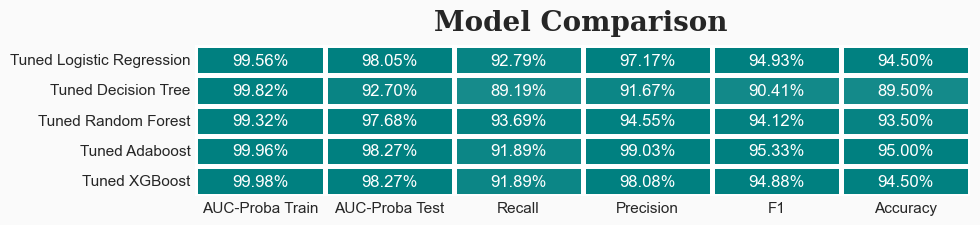

In [116]:
import matplotlib
df_models = round(pd.concat([logreg_df, dtree_df, rforest_df, adaboost_df, xgboost_df], axis=1),4)
colors = [Colors.LightGray, Colors.LightCyan, Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


fig = plt.figure(figsize=(10,8),dpi=100, facecolor=Colors.LightGray) # create figure
gs = fig.add_gridspec(3, 2, wspace=0.1, hspace=0.5)

ax0 = fig.add_subplot(gs[0:1, :])

sns.heatmap(df_models.T, cmap=colormap, annot=True,fmt=".2%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(Colors.LightGray) 
ax0.set_facecolor(Colors.LightGray)
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(1.85,-0.5,'Model Comparison',fontsize=20,fontweight='bold',fontfamily='serif')

## Feature Importance

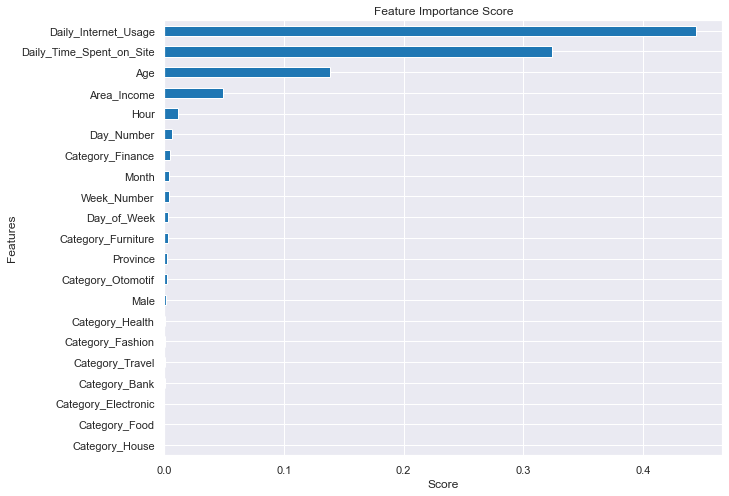

In [117]:
show_feature_importance(tuned_rforest)

## Final Model

In [118]:
final_model = RandomForestClassifier(random_state=42, n_estimators = 9, min_samples_split = 68, min_samples_leaf = 5, 
                                     max_features = 'sqrt', max_depth = 9, criterion = 'entropy' )

final_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=68, n_estimators=9,
                       random_state=42)

In [119]:
evaluation_tuned(final_model)

**EVALUATION WITH TRAIN TEST SPLIT**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 0.993164
AUC Score Test proba: 0.97682

Others Metrics Evaluation:
Test Accuracy Score : 0.935
Precision Score Test: 0.9455
Recall Score Test : 0.9369
F1 Score Test : 0.9412

**CONFUSION MATRIX**
[[ 83   6]
 [  7 104]]


In [120]:
y_pred = final_model.predict(X_test[X_train.columns])
y_pred_train = final_model.predict(X_train)
y_pred_proba = final_model.predict_proba(X_test[X_train.columns])
y_pred_proba_train = final_model.predict_proba(X_train)

model_final = pd.DataFrame(data=[round(roc_auc_score(y_test,y_pred_proba[:,1]),5),
                                 round(recall_score(y_test,y_pred),4),
                                 round(precision_score(y_test,y_pred),4),
                                 round(f1_score(y_test,y_pred),4),
                                 round(accuracy_score(y_test,y_pred),4)],
                                columns = [' '],
                                index=['AUC-Proba','Recall','Precision','F1','Accuracy'])

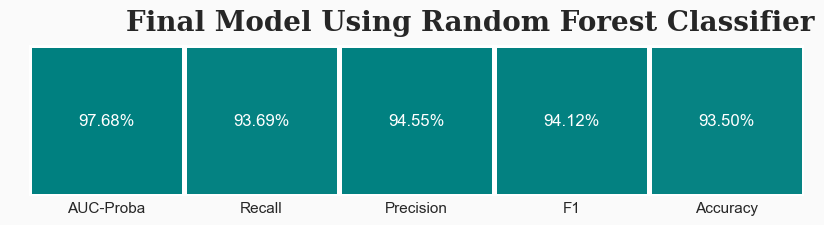

In [121]:
import matplotlib
df_models = round(pd.concat([model_final], axis=1),4)
colors = [Colors.LightGray, Colors.LightCyan, Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


fig = plt.figure(figsize=(10,8),dpi=100, facecolor=Colors.LightGray) # create figure
gs = fig.add_gridspec(3, 2, wspace=0.1, hspace=0.5)

ax0 = fig.add_subplot(gs[0:1, :])

sns.heatmap(df_models.T, cmap=colormap, annot=True,fmt=".2%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(Colors.LightGray) 
ax0.set_facecolor(Colors.LightGray)
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(0.625,-0.1,'Final Model Using Random Forest Classifier',fontsize=20,fontweight='bold',fontfamily='serif')

fig.show()

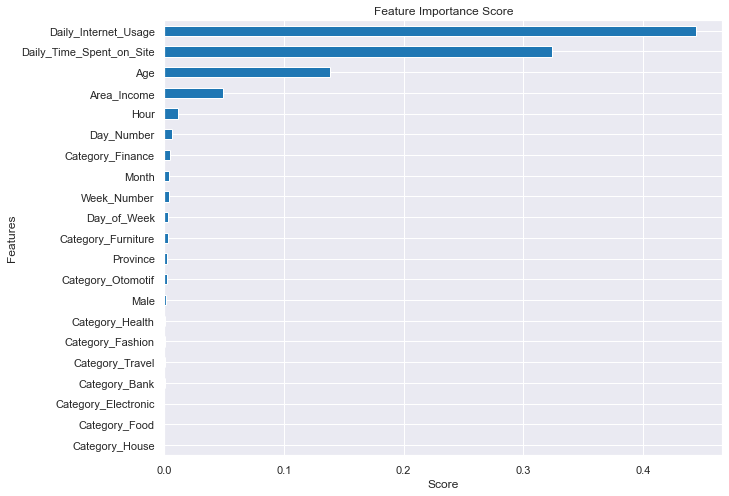

In [122]:
feat_importances = pd.Series(final_model.feature_importances_, index = X_train.columns)
ax = feat_importances.nlargest(30).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Feature Importance Score')
plt.show()

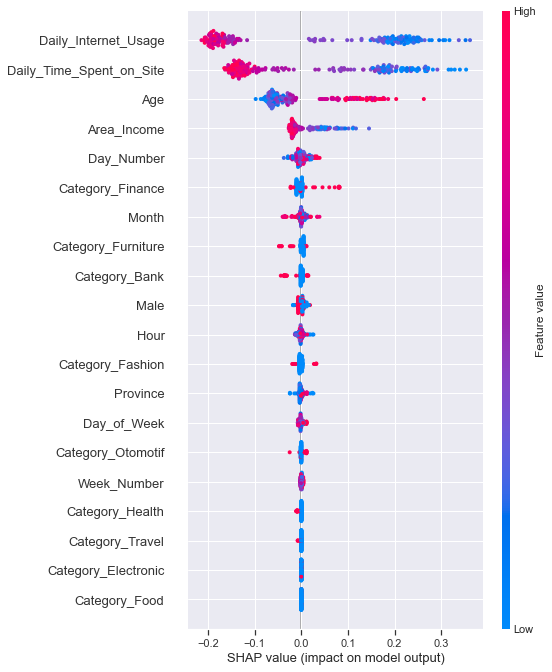

In [123]:
import shap
explainer = shap.TreeExplainer(final_model)
shap_values =  explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)